# 读入被试数据

In [3]:
import json
def merge_to_json(input_file:str) -> list:
    with open(input_file) as infile:
        data = [json.loads(line) for line in infile]
    return data

data_path = "results/jatos_results_20221230073850.txt"
participants_datas = merge_to_json(data_path)
print(f"Number of participants: {len(participants_datas)}")

Number of participants: 8


# 排序情况分析

In [4]:
from natsort import natsorted
import numpy as np

all_personal_information = []
all_trials = []
all_sorted_results = []

for participant_data in participants_datas:
    personal_informations = participant_data[2]['response']
    all_personal_information.append(personal_informations)
    all_trials.append(participant_data[4:-2])
    sorted_results = participant_data[-1]['sorted_result']
    all_sorted_results.append(sorted_results)

all_scored_results = []
for result in all_sorted_results:
    k = 1/len(result)
    scored_results = {}
    for i in range(len(result)):
        score = k * i
        scored_results[result[i]] = score
    all_scored_results.append(scored_results)

nat_sorted_scored_results = []
for scored_results in all_scored_results:
    nat_sorted_scored_results.append({key:scored_results[key] for key in natsorted(scored_results.keys())})
# all_names = natsorted(all_scored_results[0].keys())
each_image_scores = {}
for name in nat_sorted_scored_results[0].keys():
    each_image_scores[name] = []
for scored_results in nat_sorted_scored_results:
    for name, score in scored_results.items():
        each_image_scores[name].append(score)
for image, scores in each_image_scores.items():
    each_image_scores[image] = np.mean(scores)


# sort each_image_scores as value
sorted_each_image_scores = sorted(each_image_scores.items(), key=lambda x:x[1], reverse=False)
# remove .png from sorted_each_image_scores keys, and int 
sorted_each_image_scores = [(int(name[:-4]), score) for name, score in sorted_each_image_scores]

key_sorted_each_image_scores = sorted(sorted_each_image_scores, key=lambda x:x[0])
print(key_sorted_each_image_scores)
np.save("results/sorted_each_image_scores.npy", key_sorted_each_image_scores)

[(0, 0.31666666666666665), (1, 0.5), (2, 0.5194444444444444), (3, 0.6527777777777778), (4, 0.2694444444444445), (5, 0.4555555555555556), (6, 0.4305555555555556), (7, 0.4166666666666667), (8, 0.575), (9, 0.31666666666666665), (10, 0.5472222222222223), (11, 0.7638888888888888), (12, 0.10555555555555557), (13, 0.6055555555555556), (14, 0.32222222222222224), (15, 0.3944444444444445), (16, 0.4638888888888889), (17, 0.26388888888888895), (18, 0.49722222222222223), (19, 0.43333333333333335), (20, 0.3944444444444445), (21, 0.2), (22, 0.4833333333333333), (23, 0.08888888888888889), (24, 0.3055555555555556), (25, 0.4083333333333334), (26, 0.5055555555555556), (27, 0.06666666666666667), (28, 0.5916666666666667), (29, 0.21666666666666667), (30, 0.7166666666666667), (31, 0.8361111111111111), (32, 0.8555555555555555), (33, 0.9305555555555556), (34, 0.7805555555555556), (35, 0.6361111111111112), (36, 0.2638888888888889), (37, 0.8833333333333334), (38, 0.3055555555555556), (39, 0.9111111111111111), (4

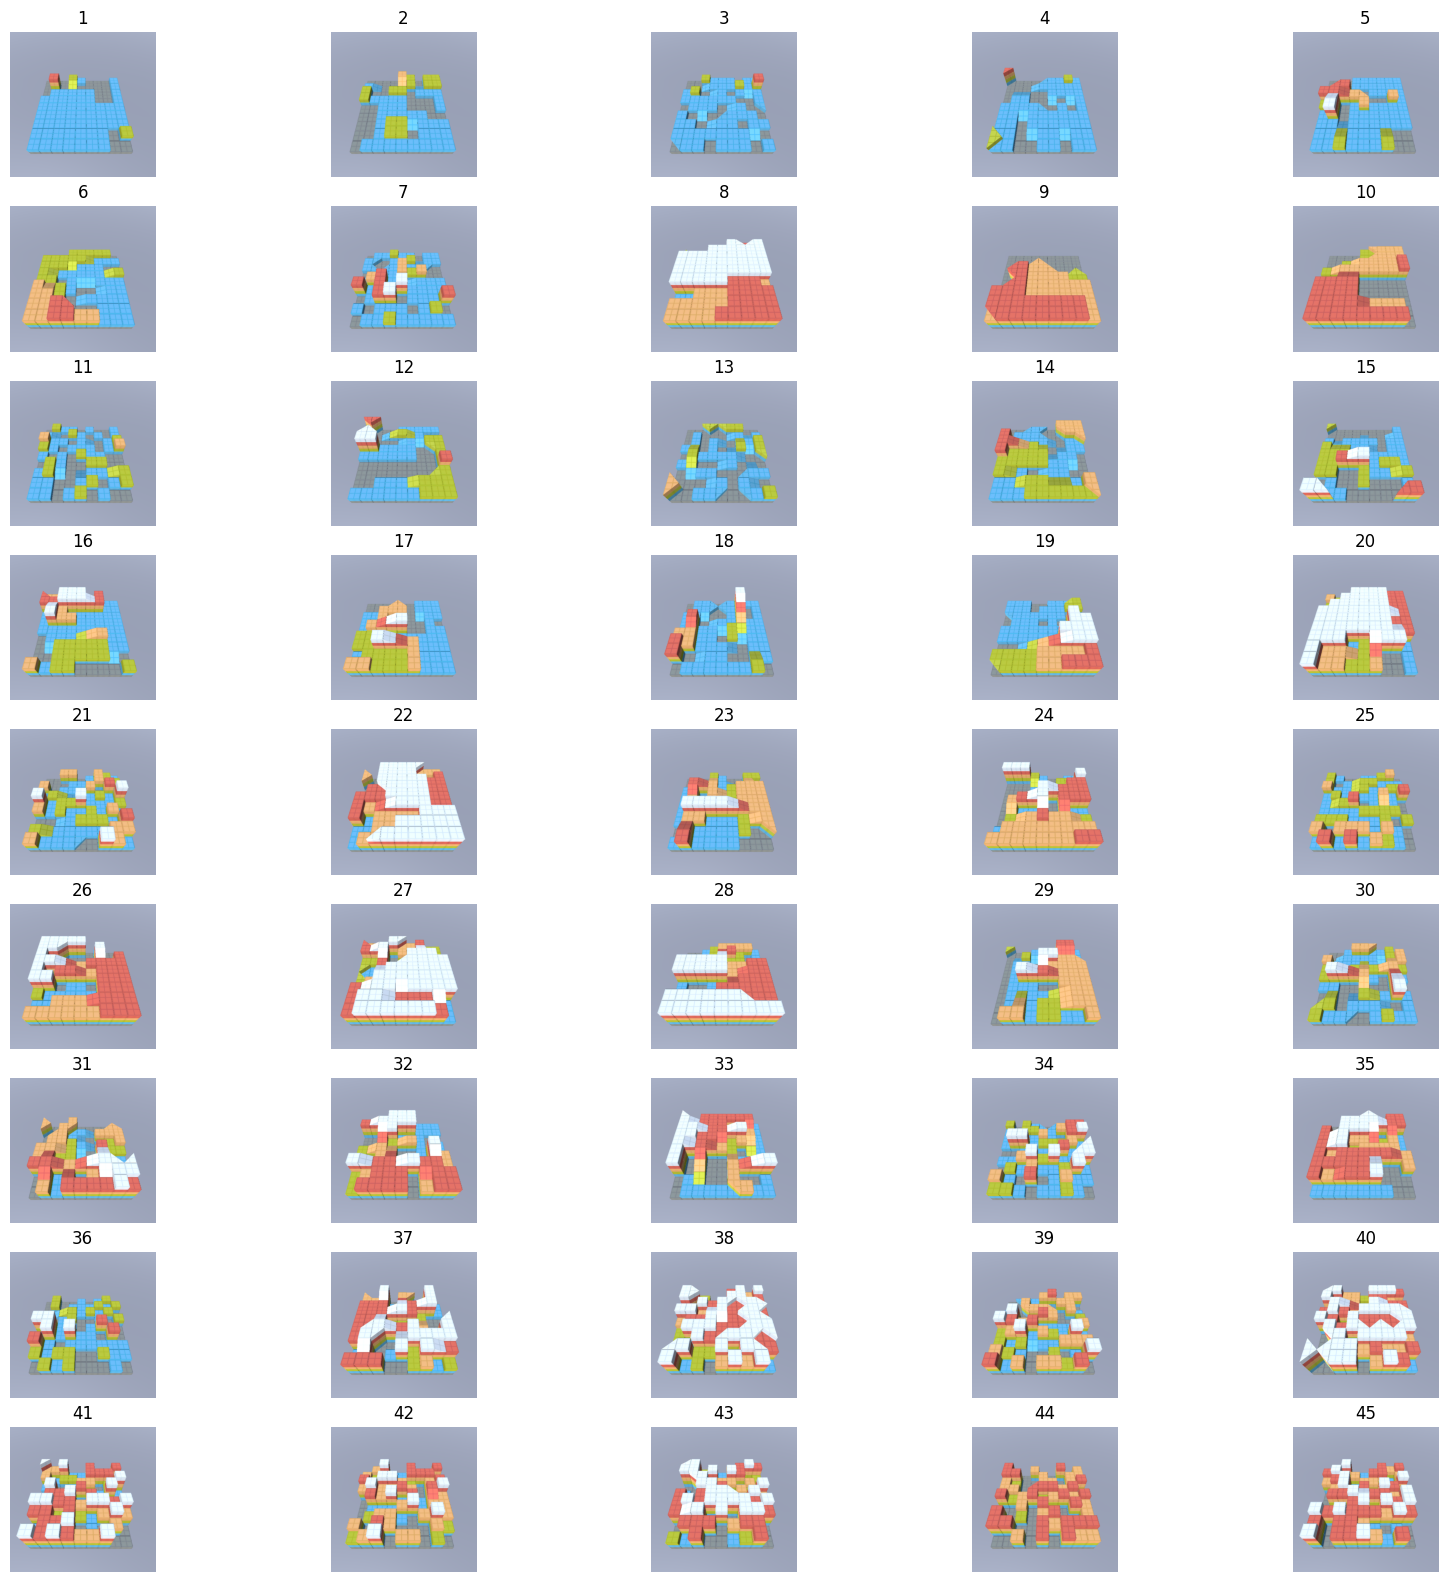

In [5]:
from natsort import natsorted
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# plot the image as the sequence of sorted_each_image_scores
all_image_path = natsorted(glob("images/*.png"))
all_images = []

for key, value in sorted_each_image_scores:
    all_images.append(Image.open(all_image_path[key]))

# plot all the images, with each line has 5 images
fig, axes = plt.subplots(9, 5, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(all_images[i])
    ax.axis("off")
    ax.title.set_text(f"{i+1}")
plt.show()


# 相关分析(老板说这块分析是错的)

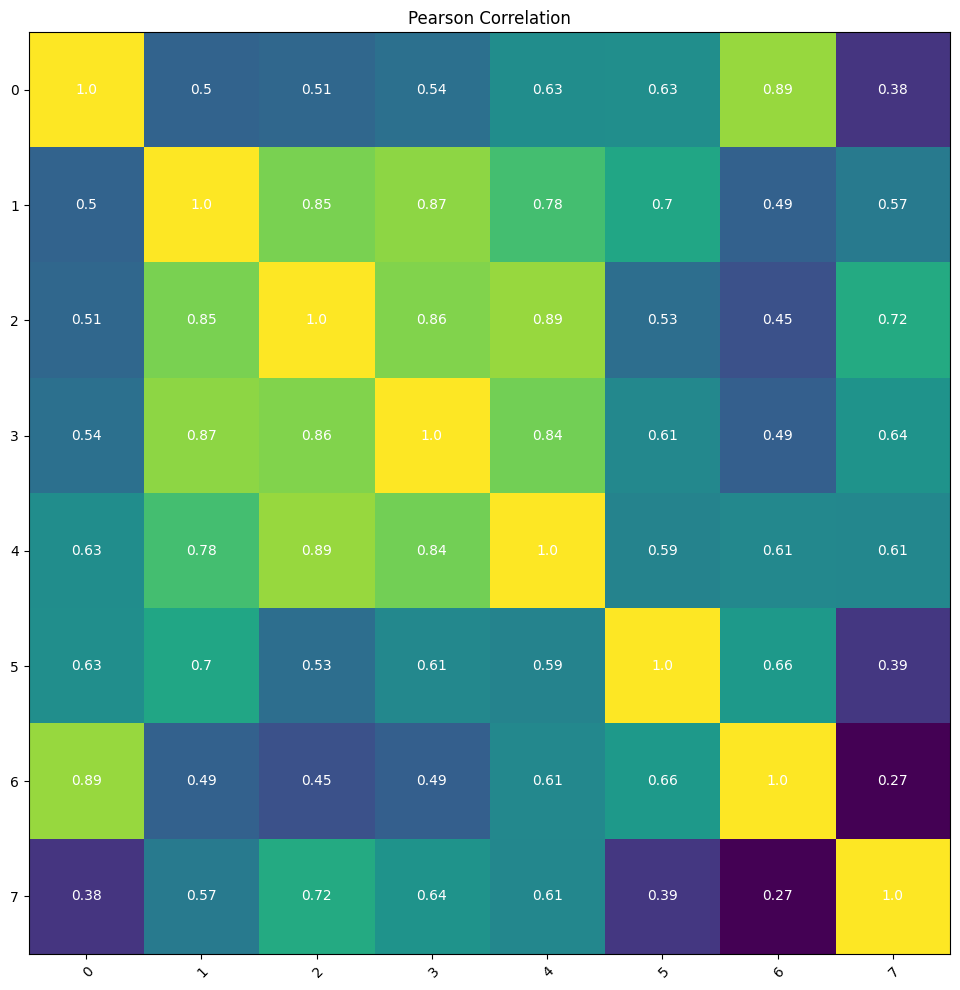

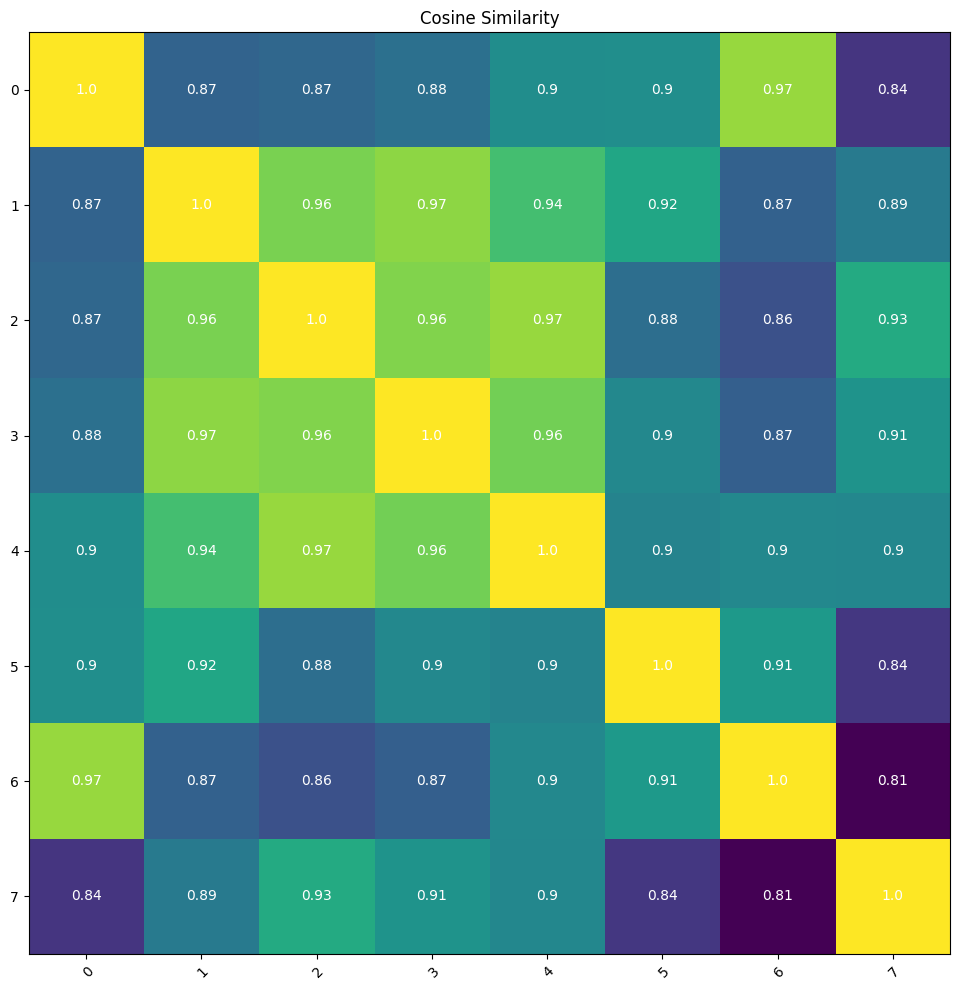

In [6]:
import matplotlib.pyplot as plt
# remove .png from all_scored_results keys, and int 
number_all_scored_results = []
for scored_results in all_scored_results:
    number_scored_results = {}
    for name, score in scored_results.items():
        number_scored_results[int(name[:-4])] = score
    number_all_scored_results.append(number_scored_results)
number = len(number_all_scored_results[0])
all_scores = np.zeros((8, number))
for i in range(len(number_all_scored_results)):
    for j in range(number):
        all_scores[i][j] = number_all_scored_results[i][j]
# perason correlation
corr = np.corrcoef(all_scores)
# Plot correlation matrix with text annotations, keep 0.01
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr)
ax.set_xticks(np.arange(len(corr)))
ax.set_yticks(np.arange(len(corr)))
# ax.set_xticklabels(corr)
# ax.set_yticklabels(all_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, round(corr[i, j], 2),
                        ha="center", va="center", color="w")
ax.set_title("Pearson Correlation")
fig.tight_layout()
plt.show()

# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(all_scores)
# Plot correlation matrix with text annotations, keep 0.01
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cosine_similarity)
ax.set_xticks(np.arange(len(cosine_similarity)))
ax.set_yticks(np.arange(len(cosine_similarity)))
# ax.set_xticklabels(corr)
# ax.set_yticklabels(all_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
for i in range(len(cosine_similarity)):
    for j in range(len(cosine_similarity)):
        text = ax.text(j, i, round(cosine_similarity[i, j], 2),
                        ha="center", va="center", color="w")
ax.set_title("Cosine Similarity")
fig.tight_layout()
plt.show()



# 剔除掉太难的地图(重复上述)

In [7]:
import json
def merge_to_json(input_file:str) -> list:
    with open(input_file) as infile:
        data = [json.loads(line) for line in infile]
    return data

data_path = "results/jatos_results_20221230073850.txt"
participants_datas = merge_to_json(data_path)
print(f"Number of participants: {len(participants_datas)}")
from natsort import natsorted
import numpy as np

hard_map = [30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 43, 44]
hard_map_image_name = [f"{i}.png" for i in hard_map]

all_personal_information = []
all_trials = []
all_sorted_results = []

for participant_data in participants_datas:
    personal_informations = participant_data[2]['response']
    all_personal_information.append(personal_informations)
    all_trials.append(participant_data[4:-2])
    sorted_results = participant_data[-1]['sorted_result']
    all_sorted_results.append(sorted_results)

# filter map not in hard_map
filered_all_sorted_results = []
for sorted_results in all_sorted_results:
    filered_sorted_results = []
    for name in sorted_results:
        if name not in hard_map_image_name:
            filered_sorted_results.append(name)
    filered_all_sorted_results.append(filered_sorted_results)

all_scored_results = []
for result in filered_all_sorted_results:
    k = 1/len(result)
    scored_results = {}
    for i in range(len(result)):
        score = k * i
        scored_results[result[i]] = score
    all_scored_results.append(scored_results)
# all_names = natsorted(all_scored_results[0].keys())
each_image_scores = {}
for name in all_scored_results[0].keys():
    each_image_scores[name] = []
for scored_results in all_scored_results:
    for name, score in scored_results.items():
        each_image_scores[name].append(score)
for image, scores in each_image_scores.items():
    each_image_scores[image] = np.mean(scores)


# sort each_image_scores as value
sorted_each_image_scores = sorted(each_image_scores.items(), key=lambda x:x[1], reverse=False)
# remove .png from sorted_each_image_scores keys, and int 
sorted_each_image_scores = [(int(name[:-4]), score) for name, score in sorted_each_image_scores]


Number of participants: 8


IndexError: list index out of range

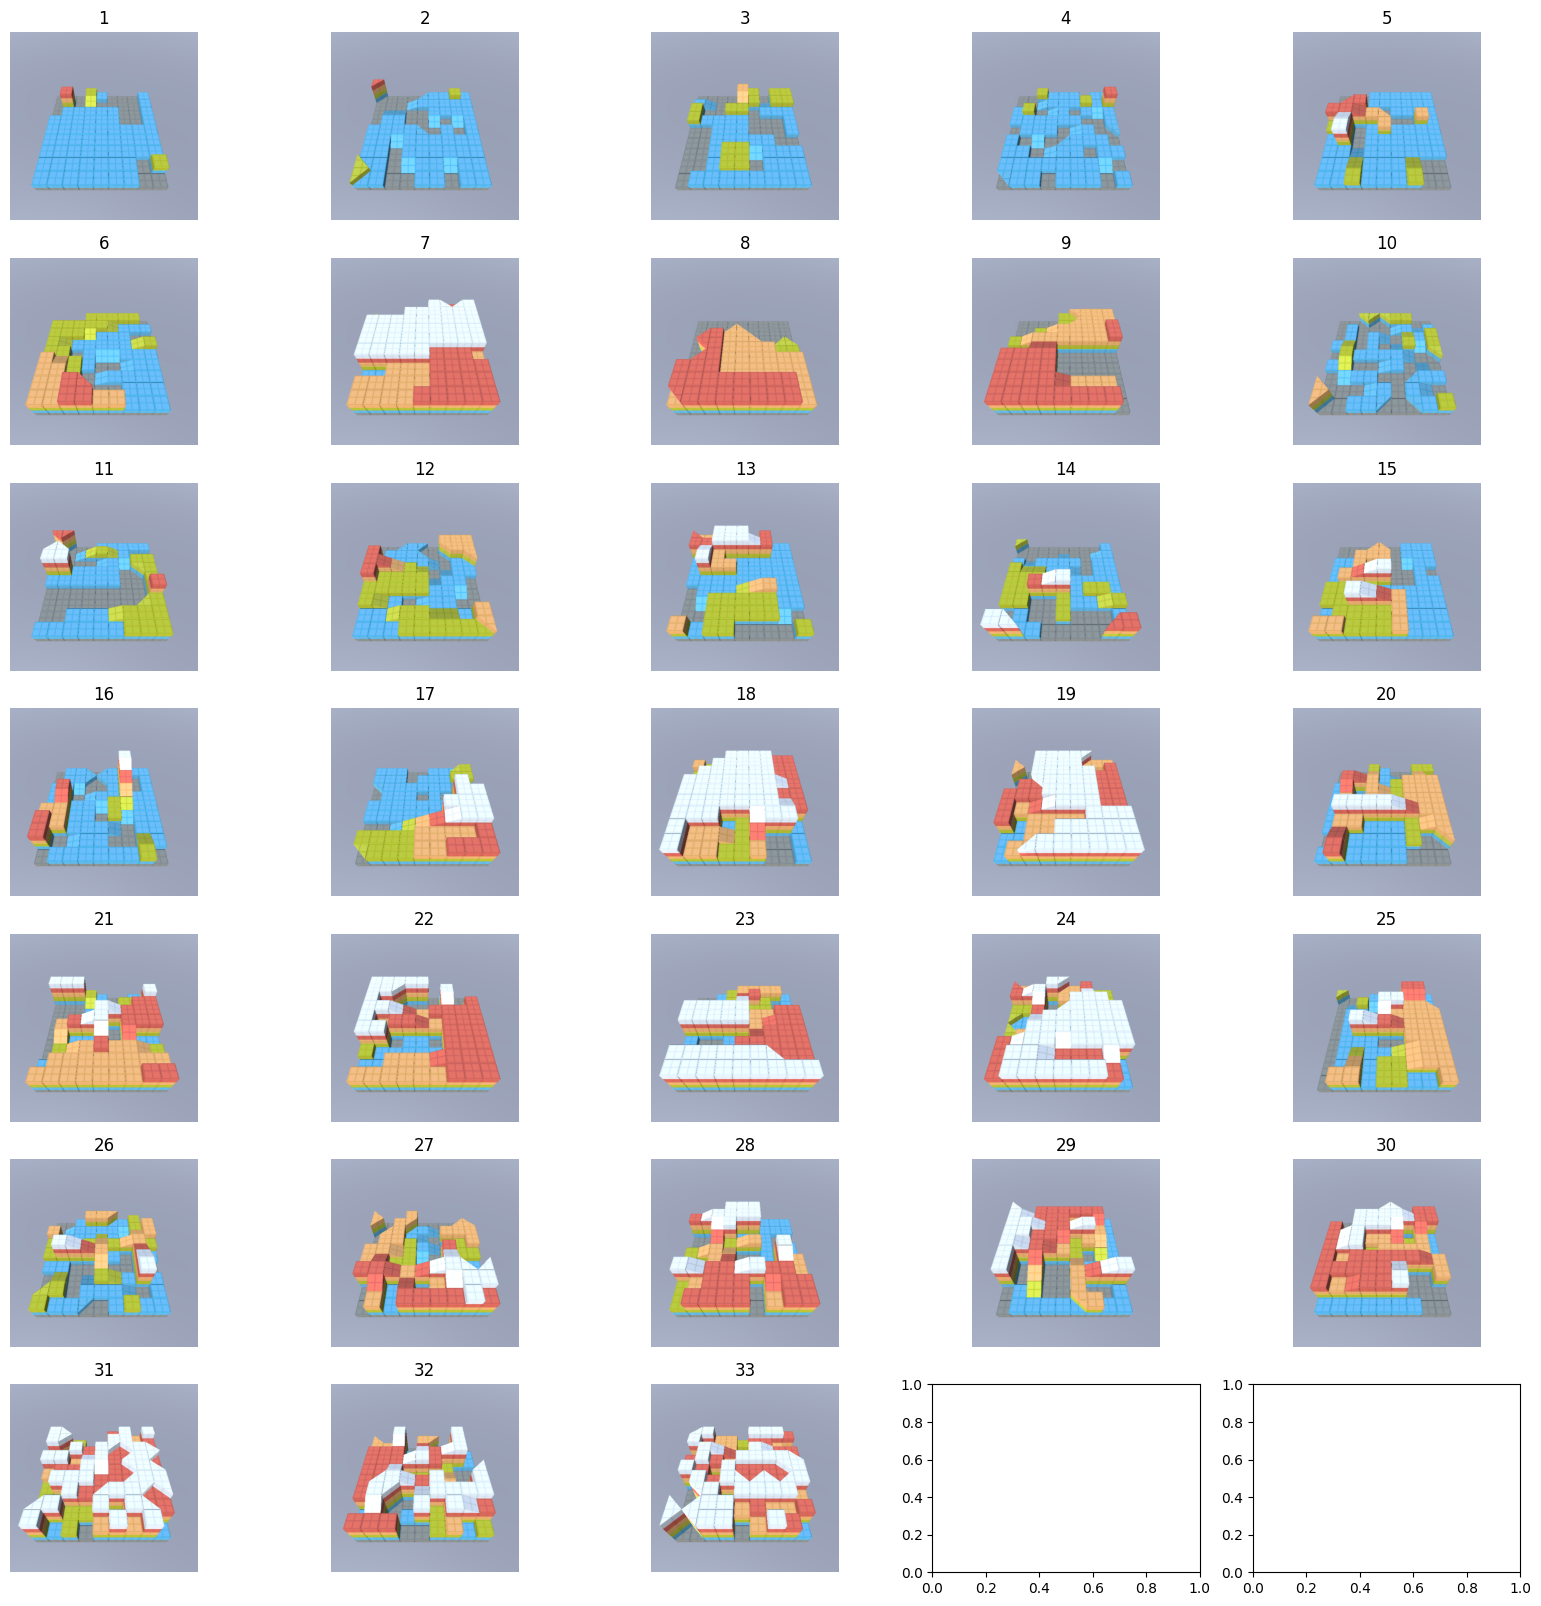

In [8]:
from natsort import natsorted
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# plot the image as the sequence of sorted_each_image_scores
all_image_path = natsorted(glob("images/*.png"))
all_images = []

for key, value in sorted_each_image_scores:
    all_images.append(Image.open(all_image_path[key]))
# plot all the 33 images, with each line has 5 images
fig, axes = plt.subplots(7, 5, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(all_images[i])
    ax.axis('off')
    ax.title.set_text(f"{i+1}")
plt.show()


33


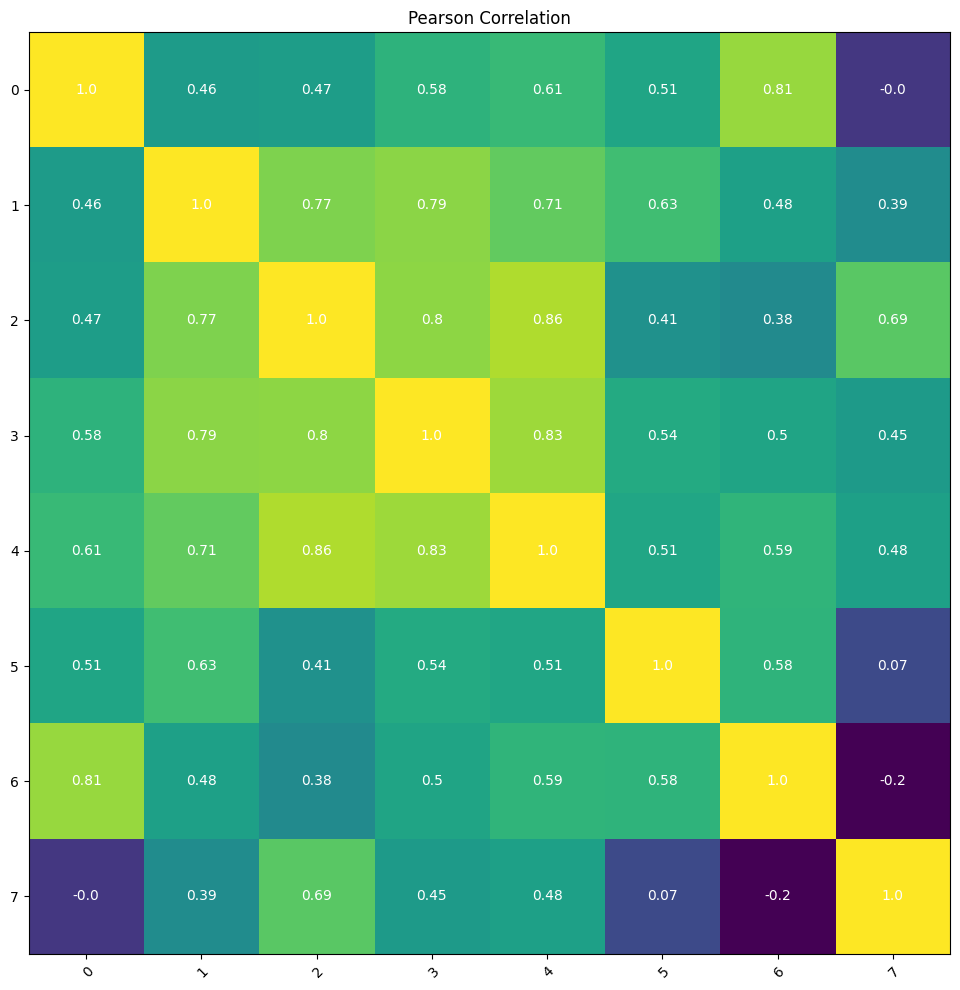

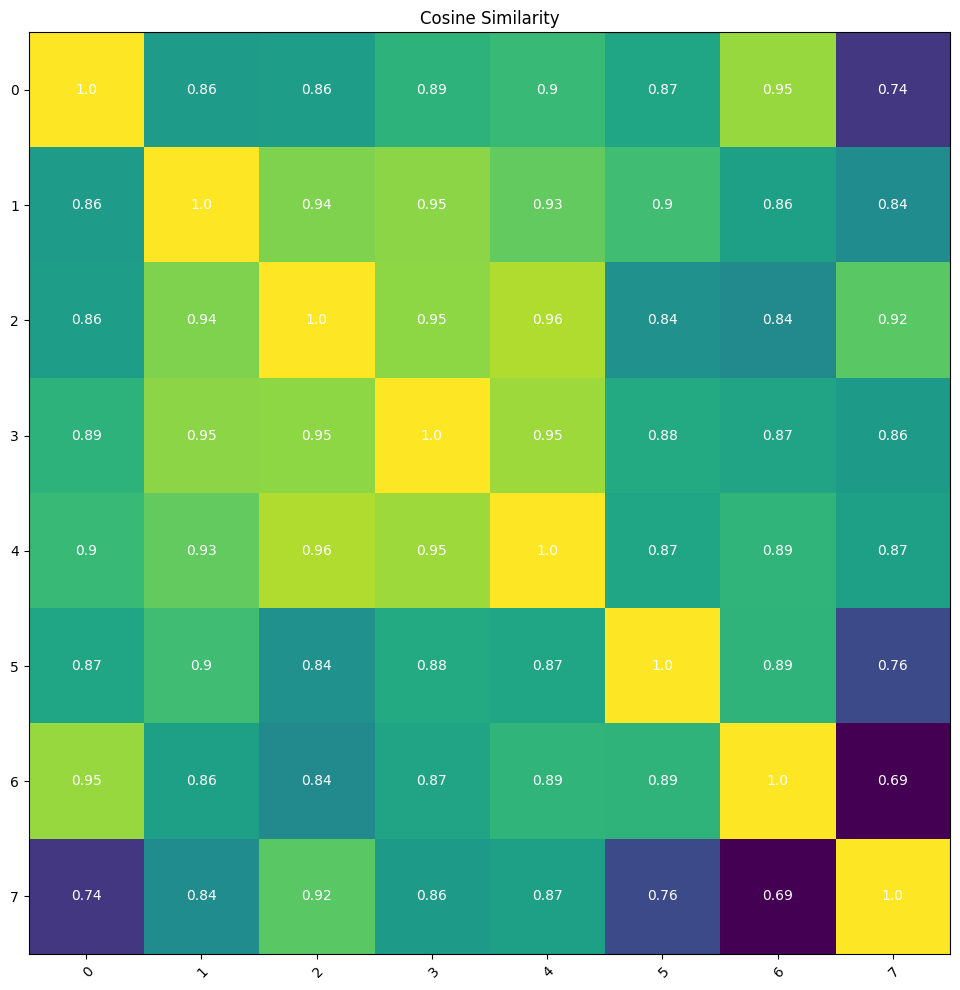

In [9]:
import matplotlib.pyplot as plt
# remove .png from all_scored_results keys, and int 
number_all_scored_results = []
for scored_results in all_scored_results:
    number_scored_results = {}
    for name, score in scored_results.items():
        number_scored_results[int(name[:-4])] = score
    number_all_scored_results.append(number_scored_results)
print(len(number_all_scored_results[0]))
number = len(filered_all_sorted_results[0])
all_scores = []
# for number_all_scored_results
for i in range(len(number_all_scored_results)):
    scores = []
    for key in natsorted(number_all_scored_results[i].keys()):
        scores.append(number_all_scored_results[i][key])
    all_scores.append(scores)
all_scores = np.array(all_scores)
# perason correlation
corr = np.corrcoef(all_scores)
# Plot correlation matrix with text annotations, keep 0.01
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr)
ax.set_xticks(np.arange(len(corr)))
ax.set_yticks(np.arange(len(corr)))
# ax.set_xticklabels(corr)
# ax.set_yticklabels(all_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, round(corr[i, j], 2),
                        ha="center", va="center", color="w")
ax.set_title("Pearson Correlation")
fig.tight_layout()
plt.show()

# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(all_scores)
# Plot correlation matrix with text annotations, keep 0.01
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cosine_similarity)
ax.set_xticks(np.arange(len(cosine_similarity)))
ax.set_yticks(np.arange(len(cosine_similarity)))
# ax.set_xticklabels(corr)
# ax.set_yticklabels(all_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
for i in range(len(cosine_similarity)):
    for j in range(len(cosine_similarity)):
        text = ax.text(j, i, round(cosine_similarity[i, j], 2),
                        ha="center", va="center", color="w")
ax.set_title("Cosine Similarity")
fig.tight_layout()



# 把分数情况导出成CSV, 以便其他软件分析

In [10]:
import csv
with open('all_scored_results.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['participants','image_name', 'score'])
    for i,scored_results in enumerate(nat_sorted_scored_results):
        for name, score in scored_results.items():
            writer.writerow([i, name, score])

# Kendall 一致性分析

In [11]:
import pandas as pd
import numpy as np

In [12]:
# scored_results
natsorted_keys_scored_results = []
for scored_results in all_scored_results:
    natsorted_keys_scored_results.append(natsorted(scored_results.keys()))
# print(natsorted_keys_scored_results)
# natsort scored_results as its keys
nat_sorted_scored_results = []
for scored_results in all_scored_results:
    nat_sorted_scored_results.append({key:scored_results[key] for key in natsorted(scored_results.keys())})
print(nat_sorted_scored_results[0])
print(nat_sorted_scored_results[1])

{'0.png': 0.7878787878787878, '1.png': 0.6363636363636364, '2.png': 0.7575757575757576, '3.png': 0.696969696969697, '4.png': 0.0, '5.png': 0.15151515151515152, '6.png': 0.5757575757575758, '7.png': 0.6666666666666667, '8.png': 0.8181818181818182, '9.png': 0.5454545454545454, '10.png': 0.8787878787878788, '11.png': 0.9393939393939394, '12.png': 0.09090909090909091, '13.png': 0.6060606060606061, '14.png': 0.7272727272727273, '15.png': 0.8484848484848485, '16.png': 0.5151515151515151, '17.png': 0.12121212121212122, '18.png': 0.33333333333333337, '19.png': 0.24242424242424243, '20.png': 0.4545454545454546, '21.png': 0.30303030303030304, '22.png': 0.42424242424242425, '23.png': 0.21212121212121213, '24.png': 0.3939393939393939, '25.png': 0.48484848484848486, '26.png': 0.2727272727272727, '27.png': 0.030303030303030304, '28.png': 0.36363636363636365, '29.png': 0.18181818181818182, '32.png': 0.9090909090909092, '34.png': 0.9696969696969697, '42.png': 0.06060606060606061}
{'0.png': 0.121212121

In [13]:
from scipy.stats import kendalltau
import scipy.stats as stats
def kendall_test(x, y):
    # 计算 Kendall 相关系数
    tau, p_value = kendalltau(x, y)
    print("Kendall 相关系数：", tau)
    
    # 计算检验统计值
    n = len(x)
    if tau == 1:
        t = 1
    else:
        t = tau * np.sqrt((n - 2) / (1 - tau ** 2))
    print("检验统计值：", t)
    
    # 计算 p 值
    p_value = 2 * (1 - stats.t.cdf(np.abs(t), n - 2))
    print("p 值：", p_value)
    
    # 输出结论
    if p_value < 0.05:
        print("拒绝原假设，有统计学意义的相关性")
    else:
        print("不能拒绝原假设")
    return tau, p_value

0 0
Kendall 相关系数： 1.0
检验统计值： 1
p 值： 0.3250527327235335
不能拒绝原假设
0 1
Kendall 相关系数： 0.3068181818181818
检验统计值： 1.7948608032163131
p 值： 0.08243261551187087
不能拒绝原假设
0 2
Kendall 相关系数： 0.3371212121212121
检验统计值： 1.993721427764094
p 值： 0.05504416884189278
不能拒绝原假设
0 3
Kendall 相关系数： 0.4053030303030303
检验统计值： 2.468469943751241
p 值： 0.019286932501507037
拒绝原假设，有统计学意义的相关性
0 4
Kendall 相关系数： 0.4393939393939394
检验统计值： 2.7234297680094905
p 值： 0.010515028689929373
拒绝原假设，有统计学意义的相关性
0 5
Kendall 相关系数： 0.37878787878787884
检验统计值： 2.2788106007198943
p 值： 0.029720111796819104
拒绝原假设，有统计学意义的相关性
0 6
Kendall 相关系数： 0.6704545454545455
检验统计值： 5.031241827148299
p 值： 1.9638290073453746e-05
拒绝原假设，有统计学意义的相关性
0 7
Kendall 相关系数： -0.01893939393939394
检验统计值： -0.1054690002250347
p 值： 0.9166831745854673
不能拒绝原假设
1 0
Kendall 相关系数： 0.3068181818181818
检验统计值： 1.7948608032163131
p 值： 0.08243261551187087
不能拒绝原假设
1 1
Kendall 相关系数： 1.0
检验统计值： 1
p 值： 0.3250527327235335
不能拒绝原假设
1 2
Kendall 相关系数： 0.5984848484848485
检验统计值： 4.1593816907517205
p

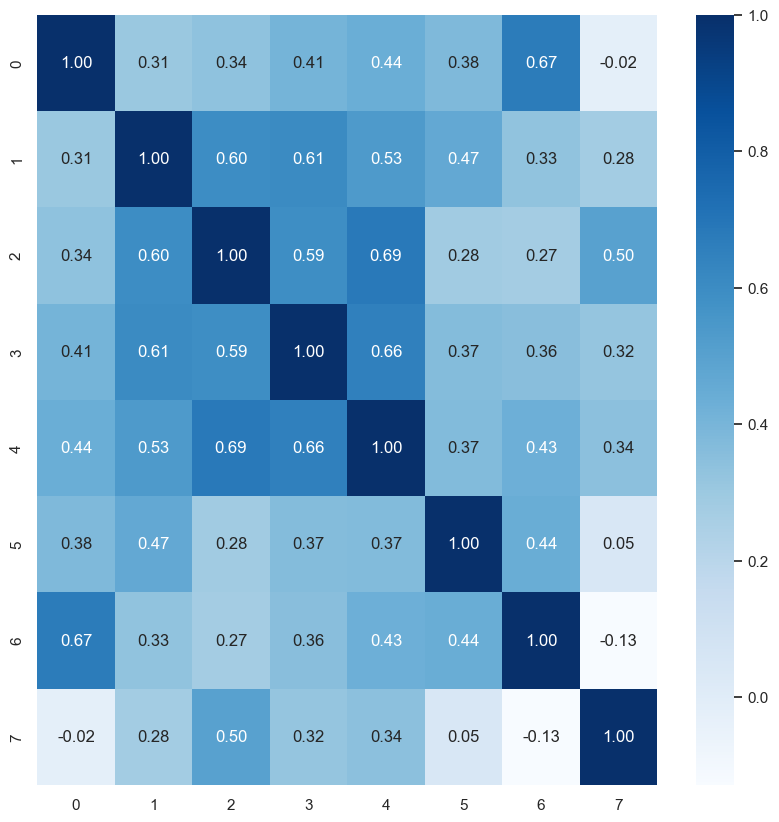

In [14]:
tau_list = []
p_value_list = []
for i in range(len(nat_sorted_scored_results)):
    for j in range(len(nat_sorted_scored_results)):
        print(i,j)
        tau, p_value = kendall_test(list(nat_sorted_scored_results[i].values()), list(nat_sorted_scored_results[j].values()))
        tau_list.append(tau)
        p_value_list.append(p_value)
# 打印被试的两两相关性
result_matrix = np.zeros((len(nat_sorted_scored_results), len(nat_sorted_scored_results)))
for i in range(len(nat_sorted_scored_results)):
    for j in range(len(nat_sorted_scored_results)):
        result_matrix[i][j] = tau_list[i*len(nat_sorted_scored_results)+j]
print(result_matrix)
# plot matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,10))
sns.heatmap(result_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.show()


# 散度评分与人类评分相关

## 地图数据

In [15]:
# key_sorted_each_image_scores
from graph_analysis import DiGraphStats
from map2graph import map2digraph, get_map_shortest_length_dist
from utils import tiles2data, tilemap2heightmap, cs_divergence
import fastwfc
import matplotlib.pyplot as plt
import numpy as np
import os
from utils import json_to_tileid
from natsort import natsorted
from glob import glob

json_path = "./stimulus_jsons/"
wfc = fastwfc.XLandWFC("samples.xml")
empty = wfc.get_ids_from_wave(wfc.build_a_open_area_wave())
empty_dist = get_map_shortest_length_dist(map2digraph(tiles2data(empty)), norm=False)
all_json_files = natsorted(glob(json_path+"*.json"))
all_map_diver = {}
for i,json_file in enumerate(all_json_files):
    ids = json_to_tileid(json_file)
    dist = get_map_shortest_length_dist(map2digraph(tiles2data(ids)), norm=False)
    divergence = cs_divergence(empty_dist, dist)
    all_map_diver[i] = divergence
print(all_map_diver)

{0: 0.4877662247694829, 1: 0.3969763732779157, 2: 0.4822586570886356, 3: 0.44713883048497793, 4: 0.40036995412210596, 5: 0.41784499664893276, 6: 0.42613688163622016, 7: 0.2721230965950306, 8: 0.6380163072767798, 9: 0.5056188436784719, 10: 0.5862843311751146, 11: 0.6319680408460338, 12: 0.15509233840023195, 13: 0.40255921921431254, 14: 0.40372440709149104, 15: 0.3826582559506768, 16: 0.7033642466395481, 17: 0.4272656271108057, 18: 0.5984476849628128, 19: 0.30498113091184526, 20: 0.4243703057858732, 21: 0.37877525266766576, 22: 0.5730527193013952, 23: 0.5847869314314017, 24: 0.3735003356663729, 25: 0.43001873728132095, 26: 0.49942295817629107, 27: 0.3211335911123152, 28: 0.605055981395412, 29: 0.2835500725951954, 30: 0.9799498432969882, 31: 1.0499999041143986, 32: 0.8097004144030759, 33: 1.173154646005365, 34: 0.49578626755448474, 35: 1.0274642772404183, 36: 0.7068274753097549, 37: 1.1830545842970763, 38: 0.9594699785034866, 39: 1.0830006296023988, 40: 0.9286446822674306, 41: 0.951174581

In [3]:
import fastwfc
w = fastwfc.XLandWFC("samples.xml")
ids, img = w.generate()
print(ids)

[(0, 0), (0, 0), (0, 0), (0, 0), (20, 1), (20, 0), (0, 0), (1, 0), (0, 0), (0, 0), (4, 0), (25, 3), (5, 0), (5, 0), (5, 0), (5, 0), (5, 0), (5, 0), (1, 0), (4, 0), (4, 0), (25, 3), (5, 0), (5, 0), (5, 0), (5, 0), (20, 3), (1, 0), (4, 0), (4, 0), (4, 0), (4, 0), (5, 0), (5, 0), (5, 0), (0, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (5, 0), (5, 0), (5, 0), (0, 0), (4, 0), (4, 0), (4, 0), (4, 0), (25, 3), (5, 0), (5, 0), (5, 0), (1, 0), (2, 0), (25, 2), (3, 0), (24, 0), (0, 0), (25, 0), (1, 0), (25, 0), (1, 0), (2, 0), (5, 0), (3, 0), (3, 0), (24, 3), (4, 0), (1, 0), (24, 0), (1, 0), (2, 0), (3, 0), (3, 0), (2, 0), (1, 0), (4, 0), (1, 0), (3, 0), (1, 0)]


## 对比相关和绘图

Result: Human sorted each image scores and EmptyDivergence of each image
Spearmans correlation: 0.671
Pearsons correlation: 0.698


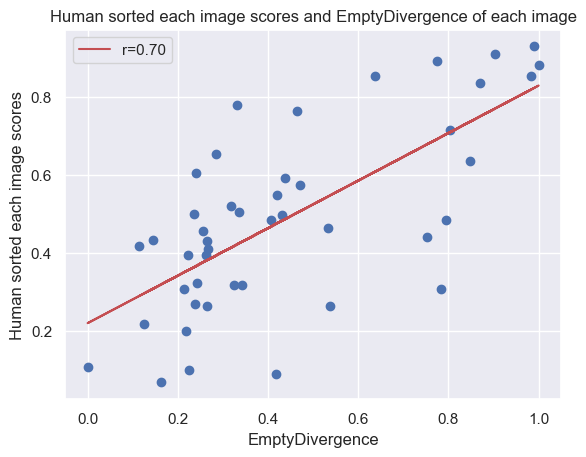

In [16]:
# min max norm
normed_diver = {}
for i, diver in all_map_diver.items():
    normed_diver[i] = (diver - min(all_map_diver.values()))/(max(all_map_diver.values())-min(all_map_diver.values()))
# print(normed_diver)
# sorted_normed_diver = {k: v for k, v in sorted(normed_diver.items(), key=lambda item: item[1])}
key_sorted_normed_diver = [(name, score) for name, score in normed_diver.items()]
np_key_sorted_normed_diver = np.array(key_sorted_normed_diver)
human_sorted_each_image_scores = np.array(key_sorted_each_image_scores)
# 分析np_key_sorted_normed_diver和human_sorted_each_image_scores的Spearman 相关系数和pearson 相关系数
from scipy.stats import spearmanr, pearsonr
s_corr, _ = spearmanr(np_key_sorted_normed_diver[:,1], human_sorted_each_image_scores[:,1])
P_corr, _ = pearsonr(np_key_sorted_normed_diver[:,1], human_sorted_each_image_scores[:,1])
print(f"Result: Human sorted each image scores and EmptyDivergence of each image")
print('Spearmans correlation: %.3f' % s_corr)
print('Pearsons correlation: %.3f' % P_corr)
# plot np_key_sorted_normed_diver and human_sorted_each_image_scores, show the correlation
plt.figure()
plt.plot(np_key_sorted_normed_diver[:,1], human_sorted_each_image_scores[:, 1], 'o')
plt.xlabel("EmptyDivergence")
plt.ylabel("Human sorted each image scores")
plt.title("Human sorted each image scores and EmptyDivergence of each image")
# plot its r line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(np_key_sorted_normed_diver[:,1], human_sorted_each_image_scores[:, 1])
line = slope*np_key_sorted_normed_diver[:,1]+intercept
plt.plot(np_key_sorted_normed_diver[:,1], line, 'r', label=f'r={r_value:.2f}')
plt.legend()
plt.show()